Q1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog
from datetime import datetime
import re

def slove_str_problemQ1 (a):
    y = re.findall('([0-9-: ]+)',a)
    return y[0]
def replace_time(event_time):
    event_time = datetime.strptime(event_time, '%Y-%m-%d %H:%M:%S ')
    return event_time
def calculate_time(event_time):
    return event_time.total_seconds()

data['event_time']=data['event_time'].apply(slove_str_problemQ1)
data['duration_to_next_event']=data['event_time'].apply(replace_time)
data.duration_to_next_event = data.duration_to_next_event.diff(periods=-1).abs()
data['duration_to_next_event']=data['duration_to_next_event'].apply(calculate_time)
data.duration_to_next_event[len(data)-1]=0

<ipython-input-3-f1cfa9ebd408>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.duration_to_next_event[len(data)-1]=0


Q2

In [4]:
def slove_str_problemQ2 (a):
    y = re.findall('([0-9-]+)',a)
    return replace_timeQ2(y[0])
def replace_timeQ2(event_time):
    event_time = datetime.strptime(event_time, '%Y-%m-%d')
    return event_time
def culculate_funnel (day,idf):
    global funnul
    if (idf==0):
        if( day.days>5 ):
            funnul =funnul+1
            return funnul
        else:
            return int(funnul)
    if (idf != 0) :
        funnul=1
        return int(funnul)

q2=data[['event_time','user_id','user_session']]
q2=q2.sort_values(by=['user_id','event_time'])
qq2=q2.reset_index()
qq2['funnel']=qq2['event_time'].apply(slove_str_problemQ2)
qq2['funnel_diff']=qq2['funnel'].diff(periods=1)
qq2['id_diff']=qq2['user_id'].diff(periods=-1)
qq2['funnel']=qq2.apply( lambda row: culculate_funnel(row['funnel_diff'],row['id_diff']), axis=1)

Q3

In [5]:
index_funnel= 1
Pfunnel =0
def culculate_index_in_funnel (funnel,session,Psession,id_diff):
    global Pfunnel
    global index_funnel
    if ( funnel == Pfunnel and id_diff==0 ):
        Pfunnel = funnel
        if (session != Psession ):
            index_funnel=index_funnel+1
            return index_funnel
        else :
            return index_funnel
    index_funnel = 1
    Pfunnel = funnel
    return index_funnel 



qq2['previous_user_session']=qq2.user_session.shift(periods=1)
qq2['id_diff']=qq2['user_id'].diff(periods=1)
qq2['index_in_funnel'] = qq2.apply( lambda row: culculate_index_in_funnel (row['funnel'],row['user_session'],row['previous_user_session'],row['id_diff']), axis=1 )

Q4

In [6]:
def slove_str_problem (a):
    y = float(re.findall('([0-9]+.[0-9]+)',a)[0])
    return y
data['price']=data['price'].apply(slove_str_problem)

TypeError: expected string or bytes-like object

Q5

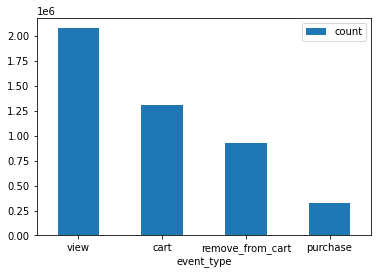

In [7]:
b=data['event_type'].value_counts()
b=b.reset_index()
ax = b.plot.bar(x='event_type', y='count', rot=0)

Q6

In [8]:
q6=qq2.sort_values(by=['index'])
qq6=q6.reset_index()
qq6=qq6.drop(columns=['index', 'level_0','previous_user_session','id_diff','funnel_diff'])
qq6['event_time']=qq6['event_time'].apply(slove_str_problemQ1)
qq6['event_time']=qq6['event_time'].apply(replace_time)
QQ6=qq6.groupby(by=['user_id','user_session','funnel','index_in_funnel']).count()
Q6=QQ6.reset_index()
qq6['duration']=data.duration_to_next_event
qq6f=qq6.drop(columns=['event_time'])
Q6F=qq6f.groupby(by=['user_id','user_session','funnel','index_in_funnel']).sum()
QQ6F=Q6F.reset_index()

def is_exsist(exsist, product_id):
    if ( exsist == True):
        return str(product_id)
    else :
        return None

q=pd.get_dummies(data.event_type)
qq6g=qq6f.drop(columns=['duration'])
qq6g['view']=q['view']
qq6g['product_id']=data.product_id
qq6g['list_of_view']=qq6g.apply( lambda row: is_exsist(row['view'],row['product_id']), axis=1)
qq6g=qq6g.drop(columns=['view','product_id'])
Q6G = qq6g.groupby(by=['user_id','funnel','index_in_funnel','user_session']).agg (lambda x: list(x))
QQ6G=Q6G.reset_index()

qq6h=qq6g.drop(columns=['list_of_view'])
qq6h['cart']=q['cart']
qq6h['product_id']=data.product_id
qq6h['list_of_added_to_car']=qq6h.apply( lambda row: is_exsist(row['cart'],row['product_id']), axis=1)
qq6h=qq6h.drop(columns=['cart','product_id'])
Q6H=qq6h.groupby(by=['user_id','user_session','funnel','index_in_funnel']).agg (lambda x: list(x))
QQ6H=Q6H.reset_index()

qq6i=qq6h.drop(columns=['list_of_added_to_car'])
qq6i['purchase']=q['purchase']
qq6i['product_id']=data.product_id
qq6i['list_of_purchase']=qq6i.apply( lambda row: is_exsist(row['purchase'],row['product_id']), axis=1)
qq6i=qq6i.drop(columns=['purchase','product_id'])
Q6I=qq6i.groupby(by=['user_id','user_session','funnel','index_in_funnel']).agg (lambda x: list(x))
QQ6I=Q6I.reset_index()

Q6['duration']=QQ6F['duration']
Q6['list_of_view']=QQ6G['list_of_view']
Q6['list_of_added_to_car']=QQ6H['list_of_added_to_car']
Q6['list_of_purchase']=QQ6I['list_of_purchase']
session_data=Q6